<a href="https://colab.research.google.com/github/jenniferamhajduk/AIML_Playground/blob/main/MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [178]:
NUM_CLASSES = 4
NUM_FEATURES = 2
SAMPLES = 1000
STD = 1.8
TEST_SPLIT=0.2
input_features = 2
output_features = 4
hidden_units = 8
epochs = 1000

In [179]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [180]:
X_blob, y_blob = make_blobs(n_samples=SAMPLES, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=STD)

In [181]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=TEST_SPLIT)

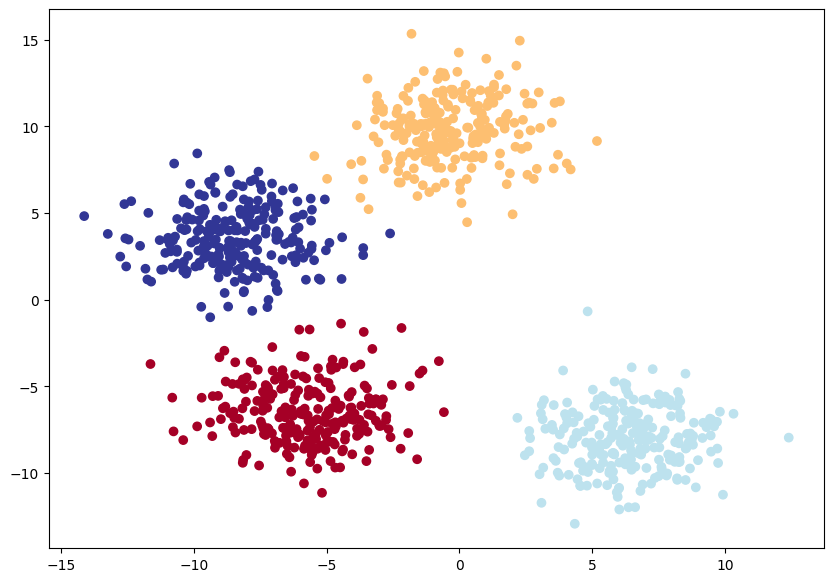

In [182]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [183]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [184]:
blob_model = BlobModel(input_features=input_features, output_features=output_features, hidden_units=hidden_units).to(device)

In [185]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=blob_model.parameters(), lr=0.01)

In [186]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

In [187]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [188]:
for epoch in range(epochs):
  blob_model.train()

  y_logits = blob_model(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy(y_blob_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  blob_model.eval()
  with torch.inference_mode():
    test_logits = blob_model(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy(y_blob_test, test_preds)

  if epoch % 50 == 0:
   print(f"Epoch: {epoch} | Accuracy: {acc: .2f}%, Loss: {loss: .4f} | Test Accuracy: {test_acc: .2f}%, Test Loss: {test_loss: .4f}")



Epoch: 0 | Accuracy:  17.50%, Loss:  1.5057 | Test Accuracy:  21.00%, Test Loss:  1.4763
Epoch: 50 | Accuracy:  84.62%, Loss:  0.8959 | Test Accuracy:  85.00%, Test Loss:  0.9056
Epoch: 100 | Accuracy:  96.88%, Loss:  0.4977 | Test Accuracy:  97.50%, Test Loss:  0.5037
Epoch: 150 | Accuracy:  99.00%, Loss:  0.2560 | Test Accuracy:  99.00%, Test Loss:  0.2639
Epoch: 200 | Accuracy:  99.75%, Loss:  0.1409 | Test Accuracy:  99.50%, Test Loss:  0.1496
Epoch: 250 | Accuracy:  99.88%, Loss:  0.0903 | Test Accuracy:  99.50%, Test Loss:  0.0984
Epoch: 300 | Accuracy:  99.88%, Loss:  0.0648 | Test Accuracy:  99.50%, Test Loss:  0.0723
Epoch: 350 | Accuracy:  99.88%, Loss:  0.0501 | Test Accuracy:  99.50%, Test Loss:  0.0571
Epoch: 400 | Accuracy:  99.88%, Loss:  0.0408 | Test Accuracy:  99.50%, Test Loss:  0.0473
Epoch: 450 | Accuracy:  99.88%, Loss:  0.0344 | Test Accuracy:  99.50%, Test Loss:  0.0406
Epoch: 500 | Accuracy:  99.88%, Loss:  0.0298 | Test Accuracy:  99.50%, Test Loss:  0.0356
Ep

In [189]:
test_preds[:10], y_blob_test[:10]

(tensor([1, 0, 3, 0, 1, 3, 0, 1, 0, 1], device='cuda:0'),
 tensor([1, 0, 3, 0, 1, 3, 0, 1, 0, 1], device='cuda:0'))